In [4]:
import pandas as pd
from sqlalchemy import create_engine

# Use SQLAlchemy engine (instead of pyodbc)
engine = create_engine(
    "mssql+pyodbc://NARENDRA\\SQLEXPRESS/sql_to_python?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# Query the customers table
query = "SELECT * FROM customers"
df = pd.read_sql(query, engine)

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
query = "SELECT DISTINCT customer_city FROM customers"
df = pd.read_sql(query, engine)
df.head()

# -- DISTINCT 
# -- Question: List all unique cities where customers are located.
# -- When to Use: Use when you want only unique values from a column like customer_city.

,customer_city
0,abadia dos dourados
1,abadiania
2,abaete
3,abaetetuba
4,abaiara


In [4]:
query = "SELECT * FROM customers WHERE customer_state = 'SP'"
df = pd.read_sql(query, engine)
df.head()

# -- WHERE
# -- Question: Show all customers from state 'SP'.
# -- When to Use: Use when filtering rows based on a condition.

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
query = "SELECT * FROM customers ORDER BY customer_zip_code_prefix"
df = pd.read_sql(query, engine)
df.head()

# -- ORDER BY
# -- Question: List customers sorted by customer_zip_code_prefix.
# -- When to Use: Use when you want sorted output based on a column.

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7ae2a9337aa4bc799723511faa1d6830,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,sao paulo,SP
1,ee9b73e88afb4904ee2322cfc89cf638,095e7c124c5c1ccb1eb9f731152eae6a,1004,sao paulo,SP
2,a09edf8c1e842e94805a206b3d73eed5,968f6d2f674977d88a4b445a5117ccd8,1004,sao paulo,SP
3,5a8b64ee6ccdae09ea823e6aa00e9517,9c84e5193d6ee59b3870e0e4e3a2dad8,1005,sao paulo,SP
4,6ec2b4682814cfdac8d92bad42b3ddab,57f0ea1c7f6b9ef8615c0a0b8f06fe57,1005,sao paulo,SP


In [6]:
query = "SELECT TOP 5 * FROM customers"
df = pd.read_sql(query, engine)
df.head()

# -- TOP
# -- Question: Show top 5 customer records.
# -- When to Use: Use when you want only a few rows from a large dataset.


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
query = """
SELECT TOP 5 * 
FROM customers 
ORDER BY customer_zip_code_prefix DESC
"""
df = pd.read_sql(query, engine)
df.head()

# -- TOP + ORDER BY
# -- Question: Show top 5 customers based on highest zip code prefix.
# -- When to Use: Use when you want the first few rows based on a sorted column.

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,f04c3f6e20a2a4318d97d7cec1d27bbf,8f846b30f8f56368cd1bf4c89efeed74,99990,muliterno,RS
1,964b34423c822e9bd9831635ccc83db2,e49eafd7e69d43b8d86f6b5590fafd02,99980,david canabarro,RS
2,657ba09c6edfbbc09f6054f541ec1f90,3dbb390afed2043063d358900ae05d0d,99980,david canabarro,RS
3,3ab8bc00f8740d54afc4c771fb6c7f69,0528a0a940c7116ccb48fdbb8e80a8ff,99970,ciriaco,RS
4,f93bb6c70a7306d18a24f77f1889916d,ee0a41f3ec008b1459efbd99c775e6ea,99965,agua santa,RS


In [8]:
query = """
SELECT customer_state, COUNT(*) AS total_customers
FROM customers
GROUP BY customer_state
"""
df = pd.read_sql(query, engine)
df.head()

# -- GROUP BY + COUNT
# -- Question: Count the number of customers from each state.
# -- When to Use: Use to group rows and count how many are in each group/category.

,customer_state,total_customers
0,GO,2020
1,MA,747
2,CE,1336
3,PB,536
4,PI,495


In [9]:
query = """
SELECT customer_city, COUNT(*) AS total_customers
FROM customers
GROUP BY customer_city
"""
df = pd.read_sql(query, engine)
df.head()

# -- GROUP BY + COUNT
# -- Question: Count how many customers are in each unique city.
# -- When to Use: Use to group rows by city and count the number of customers in each.


,customer_city,total_customers
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2


In [7]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/108.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.2 kB ? eta -:--:--
     -------------------------------------- 108.2/108.2 kB 1.6 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------- -------------------------------- 0.4/2.2 MB 13.2 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


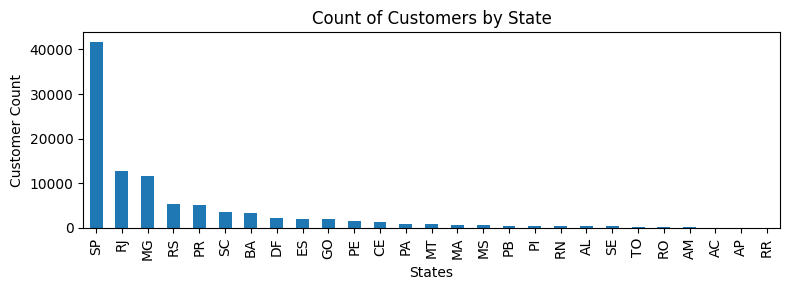

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
SELECT customer_state, COUNT(customer_id) AS customer_count
FROM customers
GROUP BY customer_state
"""
df = pd.read_sql(query, engine)
df = df.sort_values(by="customer_count", ascending=False)

df.plot(kind="bar", x="customer_state", y="customer_count", figsize=(8, 3), legend=False)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Customer Count")
plt.title("Count of Customers by State")
plt.tight_layout()
plt.show()


# -- GROUP BY + COUNT + VISUAL
# -- Question: Count and visualize number of customers from each state.
# -- When to Use: Use GROUP BY to summarize and plot comparisons.


In [10]:
query = """
SELECT * 
FROM customers 
WHERE customer_state = 'SP' 
ORDER BY customer_city
"""
df = pd.read_sql(query, engine)
df.head()

# -- WHERE + ORDER BY
# -- Question: Find SP customers, ordered by city name.
# -- When to Use: Use WHERE to filter rows and ORDER BY to sort the filtered result.

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,ed35271185aa3ecf2e421970e47e473f,643b807a55c5add3c91379b31f50d206,17800,adamantina,SP
1,9c8238260ea546e75c56fc27c0fedfc8,c7cd7684e4c3d80651bca76f2e7d9b7b,17800,adamantina,SP
2,f5219627819a30474a6ef14e1598e7f4,d36eba3490c536bfdecc22e3c68ad453,17800,adamantina,SP
3,5684f8bf0ee27f2003ba2380c4ba8b08,12caadb5a521dab786cd45e51272dddc,17800,adamantina,SP
4,cc6a744ba14a060493fb64b97087006c,f4aeb606b01219f9277b55d672719071,17800,adamantina,SP


In [11]:
query = """
SELECT customer_state AS Region, customer_city AS Town 
FROM customers
"""
df = pd.read_sql(query, engine)
df.head()

# -- SELECT + ALIAS
# -- Question: Show customer state as "Region" and city as "Town".
# -- When to Use: Use AS to rename columns for readability in reports.

,Region,Town
0,SP,franca
1,SP,sao bernardo do campo
2,SP,sao paulo
3,SP,mogi das cruzes
4,SP,campinas
